# I. Introduction


# II. CONTENTS
customer ID: A unique identifier for each customer.

gender: The gender of the customer (Male or Female).

SeniorCitizen: Indicates whether the customer is a senior citizen (0: No, 1: Yes).

Partner: Whether the customer has a partner (Yes or No).

Dependents: Whether the customer has dependents (Yes or No).

tenure: Number of months the customer has stayed with the company.

PhoneService: Whether the customer has phone service (Yes or No).

MultipleLines: Whether the customer has multiple phone lines (Yes, No, or No phone service).

InternetService: Type of internet service (DSL, Fiber optic, or No).

OnlineSecurity: Whether the customer has online security (Yes, No, or No internet service).

OnlineBackup: Whether the customer has online backup (Yes, No, or No internet service).

DeviceProtection: Whether the customer has device protection (Yes, No, or No internet service).

TechSupport: Whether the customer has technical support (Yes, No, or No internet service).

StreamingTV: Whether the customer has streaming TV (Yes, No, or No internet service).

StreamingMovies: Whether the customer has streaming movies (Yes, No, or No internet service).

Contract: The contract term of the customer (Month-to-month, One year, Two year).

PaperlessBilling: Whether the customer uses paperless billing (Yes or No).

PaymentMethod: The payment method used by the customer.

MonthlyCharges: The amount charged to the customer on a monthly basis.

TotalCharges: The total amount charged to the customer.

Churn: Indicates whether the customer has churned (Yes: customer left, No:
customer stayed).

# III. Library

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from xgboost import XGBClassifier

In [4]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


# IV. Data Overview

In [5]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DU_AN/Customer Telecom/CustomerChurn_Telco.csv")

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.columns = df.columns.str.strip().str.title()
df.head()

,Customerid,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,...,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customerid        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   Seniorcitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   Phoneservice      7043 non-null   object 
 7   Multiplelines     7043 non-null   object 
 8   Internetservice   7043 non-null   object 
 9   Onlinesecurity    7043 non-null   object 
 10  Onlinebackup      7043 non-null   object 
 11  Deviceprotection  7043 non-null   object 
 12  Techsupport       7043 non-null   object 
 13  Streamingtv       7043 non-null   object 
 14  Streamingmovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperlessbilling  7043 non-null   object 


In [9]:
# Converting Total Charges to a numerical data type.
df['Totalcharges'] = pd.to_numeric(df['Totalcharges'], errors='coerce')


## 1. Missing Value

In [10]:
df.isnull().sum()

,0
Customerid,0
Gender,0
Seniorcitizen,0
Partner,0
Dependents,0
Tenure,0
Phoneservice,0
Multiplelines,0
Internetservice,0
Onlinesecurity,0


### Handling Missing Data

In [11]:
df_nan = df[df['Totalcharges'].isnull()]
df_nan

,Customerid,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,...,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [12]:
df[df['Tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

The TotalCharges column contains 11 missing values, all associated with customers with zero tenure who have not churned. These represent newly acquired customers without billing history. Given their small proportion, these records were removed during data preprocessing.

In [13]:
#Removing missing values
df.dropna(subset=['Totalcharges'], inplace=True)

## 2. Duplicate Value

In [14]:
df[df.duplicated()]

,Customerid,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,...,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn


In [15]:
df[df.duplicated(keep = False)]

,Customerid,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,...,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn


In [16]:
df.duplicated().values.any()

np.False_

In [17]:
# Identify categorical and numerical columns
category_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns are :',category_col)

numerical_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns are :',numerical_col)

Categorical columns are : ['Customerid', 'Gender', 'Partner', 'Dependents', 'Phoneservice', 'Multiplelines', 'Internetservice', 'Onlinesecurity', 'Onlinebackup', 'Deviceprotection', 'Techsupport', 'Streamingtv', 'Streamingmovies', 'Contract', 'Paperlessbilling', 'Paymentmethod', 'Churn']
Numerical columns are : ['Seniorcitizen', 'Tenure', 'Monthlycharges', 'Totalcharges']


## 3. Outliner

In [18]:
numeric_cols = ['Tenure', 'Monthlycharges', 'Totalcharges']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Number of outliers in the column {col}: {outliers.shape[0]}")

Number of outliers in the column Tenure: 0
Number of outliers in the column Monthlycharges: 0
Number of outliers in the column Totalcharges: 0


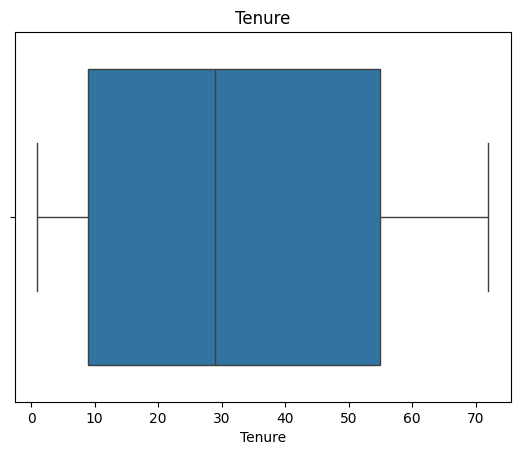

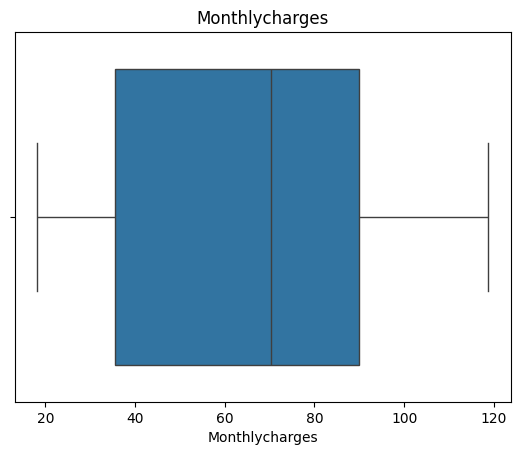

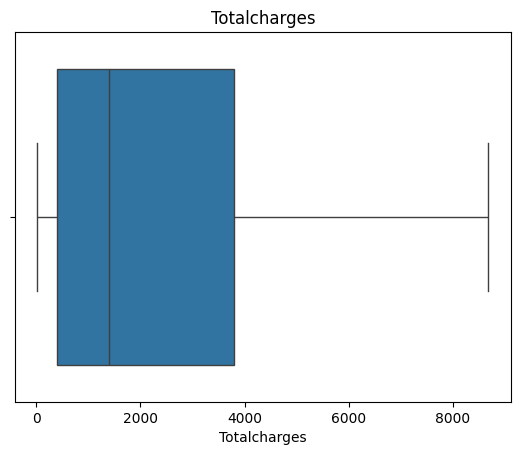

In [19]:
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

## 4. Descriptive Statistics

In [20]:
df.describe()

,Seniorcitizen,Tenure,Monthlycharges,Totalcharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
churn_rate = df['Churn'].value_counts(normalize=True)['Yes'] * 100
print(f"The current churn rate is: {churn_rate:.2f}%")


The current churn rate is: 26.58%


# V. Data Exploration

## 1. Demographics - Let us first understand the gender, age range, patner and dependent status of the customers

### Gender

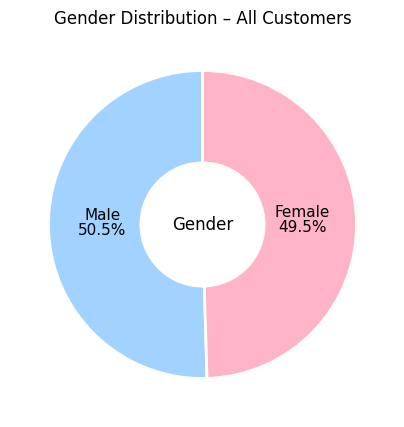

In [57]:

# Calculate gender distribution (%)
gender_dist = df['Gender'].value_counts(normalize=True) * 100
gender_dist = gender_dist.reindex(['Male','Female'])

fig, ax = plt.subplots(figsize=(5,5))

# Draw donut
wedges, _ = ax.pie(
    gender_dist,
    startangle=90,
    colors=['#A2D2FF','#FFB3C6'],  # Male blue, Female pink
    wedgeprops=dict(width=0.6, edgecolor='white', linewidth=2)
)

# Add labels: Male/Female slightly above percentage
for i, w in enumerate(wedges):
    angle = (w.theta2 + w.theta1) / 2
    x = np.cos(np.deg2rad(angle)) * 0.65
    y = np.sin(np.deg2rad(angle)) * 0.65

    # Percentage
    ax.text(
        x, y-0.03,
        f"{gender_dist.values[i]:.1f}%",
        ha='center', va='center',
        fontsize=11
    )

    # Gender label above percentage
    ax.text(
        x, y+0.07,
        gender_dist.index[i],
        ha='center', va='center',
        fontsize=11
    )

# Center text
ax.text(0,0,'Gender',ha='center',va='center',fontsize=12)

plt.title('Gender Distribution – All Customers')
plt.show()


While the overall gender distribution is balanced, female customers contribute slightly more to total churn than male customers.

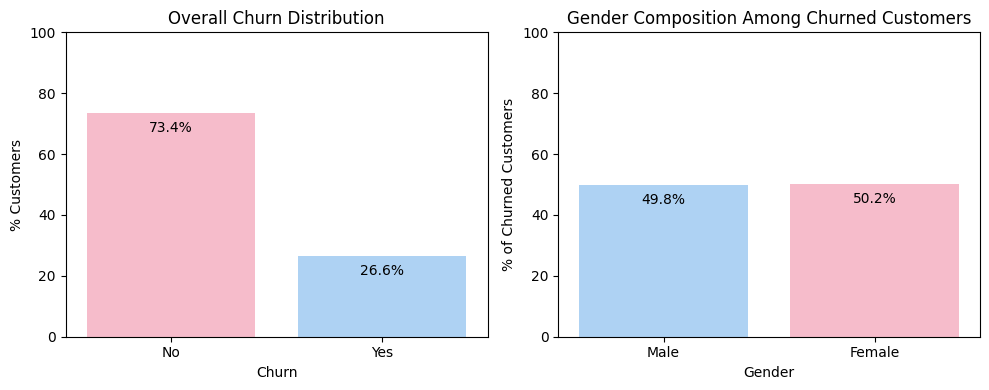

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# Chart 1: Churn Distribution
ax1 = sns.barplot(
    x=churn_dist.index,
    y=churn_dist.values,
    palette=['#FFB3C6','#A2D2FF'],
    ax=axes[0]
)

axes[0].set_title('Overall Churn Distribution')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('% Customers')
axes[0].set_ylim(0,100)

# Values inside bars
for p in ax1.patches:
    ax1.annotate(
        f"{p.get_height():.1f}%",
        (p.get_x()+p.get_width()/2, p.get_height()-5),
        ha='center',
        va='center',
        fontsize=10,
        color='black'
    )

# Chart 2: Gender Composition Among Churned Customers
# Gender distribution among churned customers
churn_gender_dist = df[df['Churn']=='Yes']['Gender'].value_counts(normalize=True) * 100
churn_gender_dist = churn_gender_dist.reindex(['Male','Female'])

ax2 = sns.barplot(
    x=churn_gender_dist.index,
    y=churn_gender_dist.values,
    palette={'Male':'#A2D2FF','Female':'#FFB3C6'},
    ax=axes[1]
)

axes[1].set_title('Gender Composition Among Churned Customers')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('% of Churned Customers')
axes[1].set_ylim(0,100)

# Values inside bars
for p in ax2.patches:
    ax2.annotate(
        f"{p.get_height():.1f}%",
        (p.get_x()+p.get_width()/2, p.get_height()-5),
        ha='center',
        va='center',
        fontsize=10,
        color='black'
    )

axes[1].set_ylim(0,100)

plt.tight_layout()
plt.show()



The overall churn rate accounts for 26.6% of total customers. Among churned customers, the gender distribution is nearly balanced, with males representing 49.8% and females 50.2%. This suggests that gender does not significantly influence customer churn behavior.

### Senior Citizens

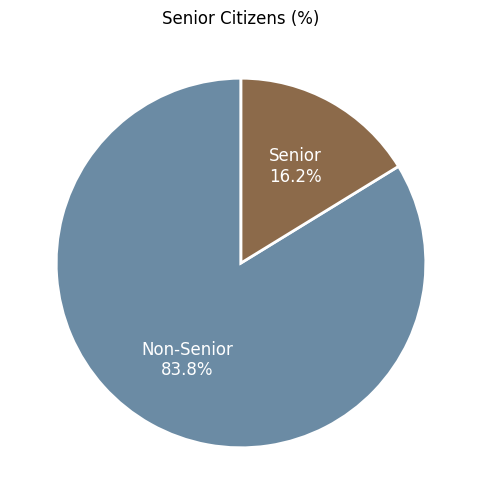

In [77]:
# Calculate Seniorcitizen percentage
senior_counts = df['Seniorcitizen'].value_counts()
labels = ['Non-Senior', 'Senior']

colors = ['#6B8BA4', '#8C6A4A']
plt.figure(figsize=(6,6))

wedges, texts, autotexts = plt.pie(
    senior_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

# default labels
for i, a in enumerate(autotexts):
    a.set_text(f"{labels[i]}\n{a.get_text()}")
    a.set_fontsize(12)
    a.set_color('white')


plt.title('Senior Citizens (%)')
plt.show()





There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

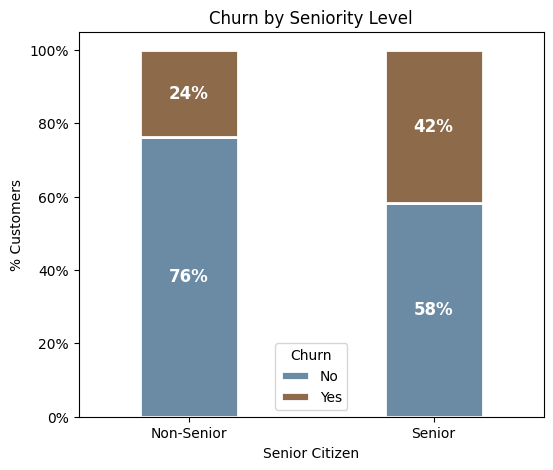

In [78]:

seniority_churn = df.groupby(['Seniorcitizen','Churn']).size().unstack()

ax2 = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(
    kind='bar',
    stacked=True,
    rot=0,
    width=0.4,
    figsize=(6,5),
    color=['#6B8BA4', '#8C6A4A'],
    edgecolor='white',
    linewidth=2
)

ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_title('Churn by Seniority Level')
ax2.set_xlabel('Senior Citizen')
ax2.set_ylabel('% Customers')
ax2.set_xticklabels(['Non-Senior','Senior'])

# default labels
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()

    ax2.annotate(
        f"{height:.0f}%",
        (x + width/2, y + height/2),
        ha='center',
        va='center',
        fontsize=12,
        color='white',
        fontweight='bold'
    )

plt.show()


Senior Citizens have almost double the churn rate than younger population.

### Partner and dependent status

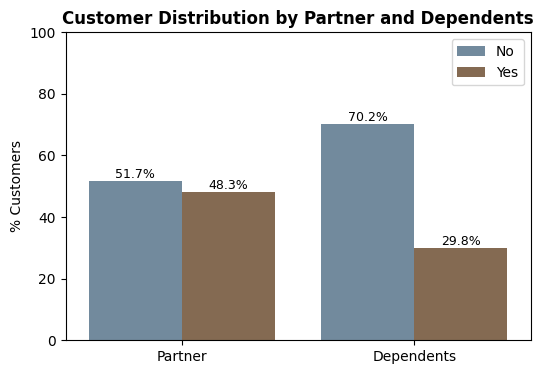

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
partner_dist = df['Partner'].value_counts(normalize=True) * 100
depend_dist = df['Dependents'].value_counts(normalize=True) * 100

dist_df = pd.DataFrame({
    'Partner': partner_dist,
    'Dependents': depend_dist
}).T

dist_df = dist_df.reset_index().melt(id_vars='index', var_name='Status', value_name='Percentage')
dist_df.columns = ['Category','Status','Percentage']

plt.figure(figsize=(6,4))

ax = sns.barplot(
    x='Category',
    y='Percentage',
    hue='Status',
    data=dist_df,
    palette=['#6B8BA4','#8C6A4A']
)

plt.title('Customer Distribution by Partner and Dependents', fontweight='bold')
plt.xlabel('')
plt.ylabel('% Customers')
plt.ylim(0,100)

# Add % labels
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(
            f"{p.get_height():.1f}%",
            (p.get_x()+p.get_width()/2, p.get_height()),
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.legend(title='')
plt.show()


Although partner status is relatively balanced, most customers do not have dependents. This indicates that many customers have partners but no dependents, and customers without dependents account for a large proportion of the dataset.

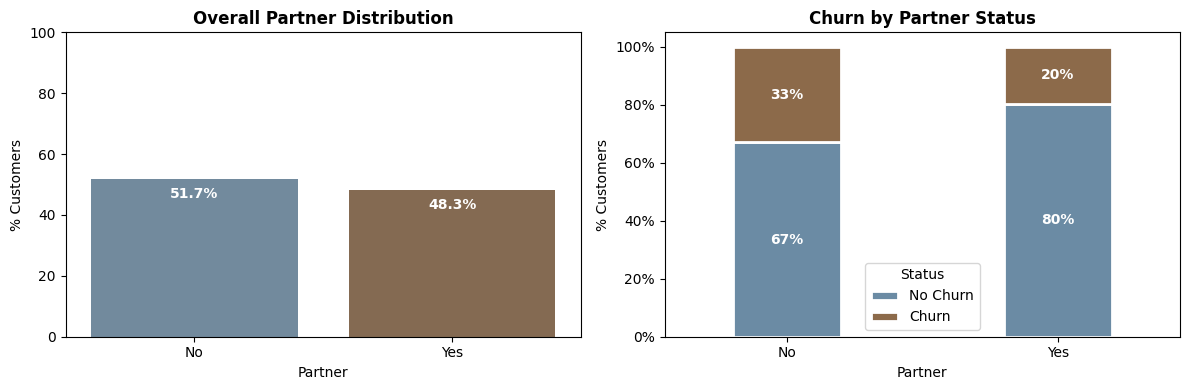

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, axes = plt.subplots(1, 2, figsize=(12,4))

# Chart 1: Overall Partner Distribution
partner_dist = df['Partner'].value_counts(normalize=True) * 100

ax1 = sns.barplot(
    x=partner_dist.index,
    y=partner_dist.values,
    palette=['#6B8BA4','#8C6A4A'],
    ax=axes[0]
)

axes[0].set_title('Overall Partner Distribution', fontweight='bold')
axes[0].set_xlabel('Partner')
axes[0].set_ylabel('% Customers')
axes[0].set_ylim(0,100)

for p in ax1.patches:
    ax1.annotate(
        f"{p.get_height():.1f}%",
        (p.get_x()+p.get_width()/2, p.get_height()-5),
        ha='center',
        va='center',
        fontsize=10,
        color='white',
        fontweight='bold'
    )

# Chart 2: Churn by Partner Status
partner_churn = df.groupby(['Partner','Churn']).size().unstack()

ax2 = (partner_churn.T*100.0 / partner_churn.T.sum()).T.plot(
    kind='bar',
    stacked=True,
    rot=0,
    width=0.4,
    color=['#6B8BA4', '#8C6A4A'],
    edgecolor='white',
    linewidth=2,
    ax=axes[1]
)

axes[1].yaxis.set_major_formatter(mtick.PercentFormatter())
axes[1].set_title('Churn by Partner Status', fontweight='bold')
axes[1].set_xlabel('Partner')
axes[1].set_ylabel('% Customers')

for p in ax2.patches:
    w, h = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax2.annotate(
        f"{h:.0f}%",
        (x+w/2, y+h/2),
        ha='center',
        va='center',
        fontsize=10,
        color='white',
        fontweight='bold'
    )
axes[1].legend(['No Churn','Churn'], title='Status')
plt.tight_layout()
plt.show()

Although partner status is relatively balanced, customers without partners exhibit higher churn rates compared to those with partners.

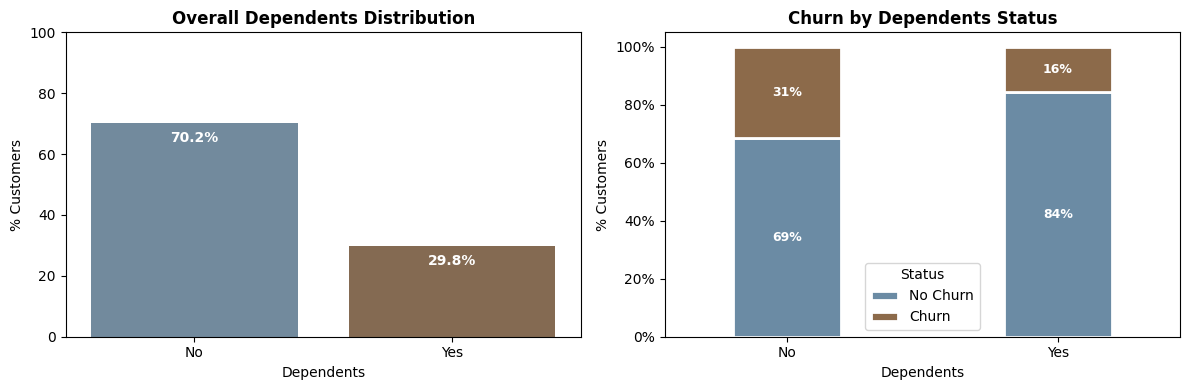

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# Chart 1: Overall Dependents Distribution
depend_dist = df['Dependents'].value_counts(normalize=True) * 100

ax1 = sns.barplot(
    x=depend_dist.index,
    y=depend_dist.values,
    palette=['#6B8BA4','#8C6A4A'],
    ax=axes[0]
)

axes[0].set_title('Overall Dependents Distribution', fontweight='bold')
axes[0].set_xlabel('Dependents')
axes[0].set_ylabel('% Customers')
axes[0].set_ylim(0,100)

for p in ax1.patches:
    ax1.annotate(
        f"{p.get_height():.1f}%",
        (p.get_x()+p.get_width()/2, p.get_height()-5),
        ha='center',
        va='center',
        fontsize=10,
        color='white',
        fontweight='bold'
    )

# Chart 2: Churn by Dependents Status
depend_churn = df.groupby(['Dependents','Churn']).size().unstack()

ax2 = (depend_churn.T*100.0 / depend_churn.T.sum()).T.plot(
    kind='bar',
    stacked=True,
    rot=0,
    width=0.4,
    color=['#6B8BA4', '#8C6A4A'],
    edgecolor='white',
    linewidth=2,
    ax=axes[1]
)

axes[1].yaxis.set_major_formatter(mtick.PercentFormatter())
axes[1].set_title('Churn by Dependents Status', fontweight='bold')
axes[1].set_xlabel('Dependents')
axes[1].set_ylabel('% Customers')

for p in ax2.patches:
    w, h = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax2.annotate(
        f"{h:.0f}%",
        (x+w/2, y+h/2),
        ha='center',
        va='center',
        fontsize=9,
        color='white',
        fontweight='bold'
    )
axes[1].legend(['No Churn','Churn'], title='Status')
plt.tight_layout()
plt.show()


Although customers without dependents account for the majority of the dataset (around 70%), they exhibit a higher churn rate (approximately 31%) compared to customers with dependents (around 16%), indicating a relationship between dependent status and customer retention.

## 2. Customer Account Information: Let u now look at the tenure, contrac

### Tenure

The tenure distribution shows that a large proportion of customers are concentrated in the early months of service, while the number of customers decreases as tenure increases. This suggests that churn tends to occur more frequently during the initial period, making tenure an important factor in churn analysis.

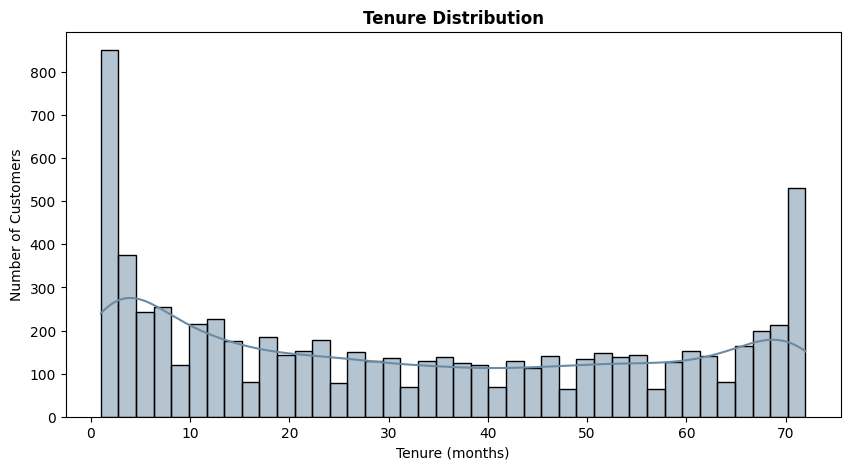

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

sns.histplot(
    df['Tenure'],
    bins=40,
    kde=True,
    color='#6B8BA4'
)

plt.title('Tenure Distribution', fontweight='bold')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')

plt.show()


The tenure distribution shows that a large proportion of customers are concentrated in the early months of service, while the number of customers decreases as tenure increases. This suggests that churn tends to occur more frequently during the initial period, making tenure an important factor in churn analysis.

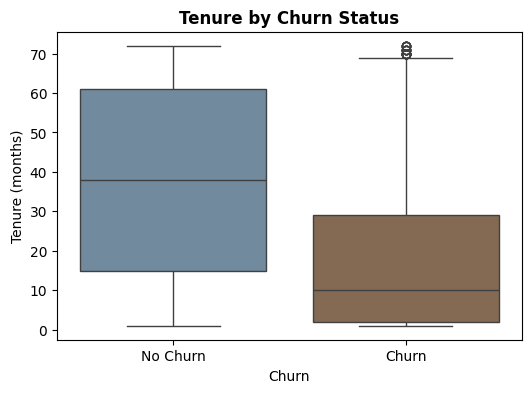

In [104]:
plt.figure(figsize=(6,4))

sns.boxplot(
    x='Churn',
    y='Tenure',
    data=df,
    palette={'No':'#6B8BA4','Yes':'#8C6A4A'}
)

plt.title('Tenure by Churn Status', fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.gca().set_xticklabels(['No Churn', 'Churn'])
plt.show()


The boxplot indicates that churned customers have significantly lower tenure compared to retained customers. The median tenure of churned customers is notably lower, suggesting that churn tends to occur earlier in the customer lifecycle.

### Contract

In [107]:
# count + percentage
contract_df = df['Contract'].value_counts().reset_index()
contract_df.columns = ['Contract','Count']
contract_df['Percentage'] = contract_df['Count'] / contract_df['Count'].sum() * 100

fig = px.bar(
    contract_df,
    x='Contract',
    y='Percentage',
    text=contract_df['Percentage'].round(1).astype(str) + '%',
    hover_data={
        'Count': True,
        'Percentage': ':.2f'
    },
    color='Contract',
    color_discrete_sequence=['#6B8BA4','#8C6A4A','#A7C7E7']
)

fig.update_layout(
    title='<b>Overall Contract Distribution</b>',
    title_x=0.5,
    xaxis_title='Contract Type',
    yaxis_title='% Customers',
    showlegend=False,
    width=700,
    height=450
)

fig.update_traces(textposition='inside')

fig.show()


More than half of the customers are on month-to-month contracts, while the remaining customers are relatively evenly split between one-year and two-year contracts.

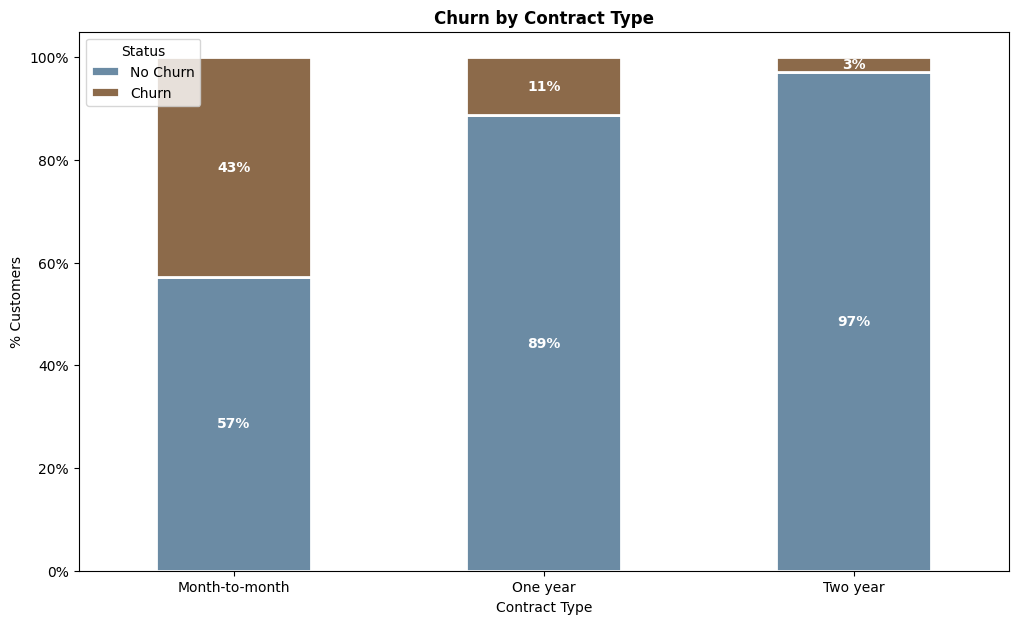

In [110]:
import matplotlib.ticker as mtick

contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(
    kind='bar',
    stacked=True,
    rot=0,
    width=0.5,
    figsize=(12,7),
    color=['#6B8BA4', '#8C6A4A'],   # No Churn / Churn
    edgecolor='white',
    linewidth=2
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('Churn by Contract Type', fontweight='bold')
ax.set_xlabel('Contract Type')
ax.set_ylabel('% Customers')

# Rename legend
ax.legend(['No Churn','Churn'], title='Status')

# Add % labels
for p in ax.patches:
    w, h = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(
        f"{h:.0f}%",
        (x+w/2, y+h/2),
        ha='center',
        va='center',
        fontsize=10,
        color='white',
        fontweight='bold'
    )

plt.show()


Customers on month-to-month contracts have the highest churn rates, while long-term contracts show lower churn, indicating that longer contract durations are associated with reduced churn.

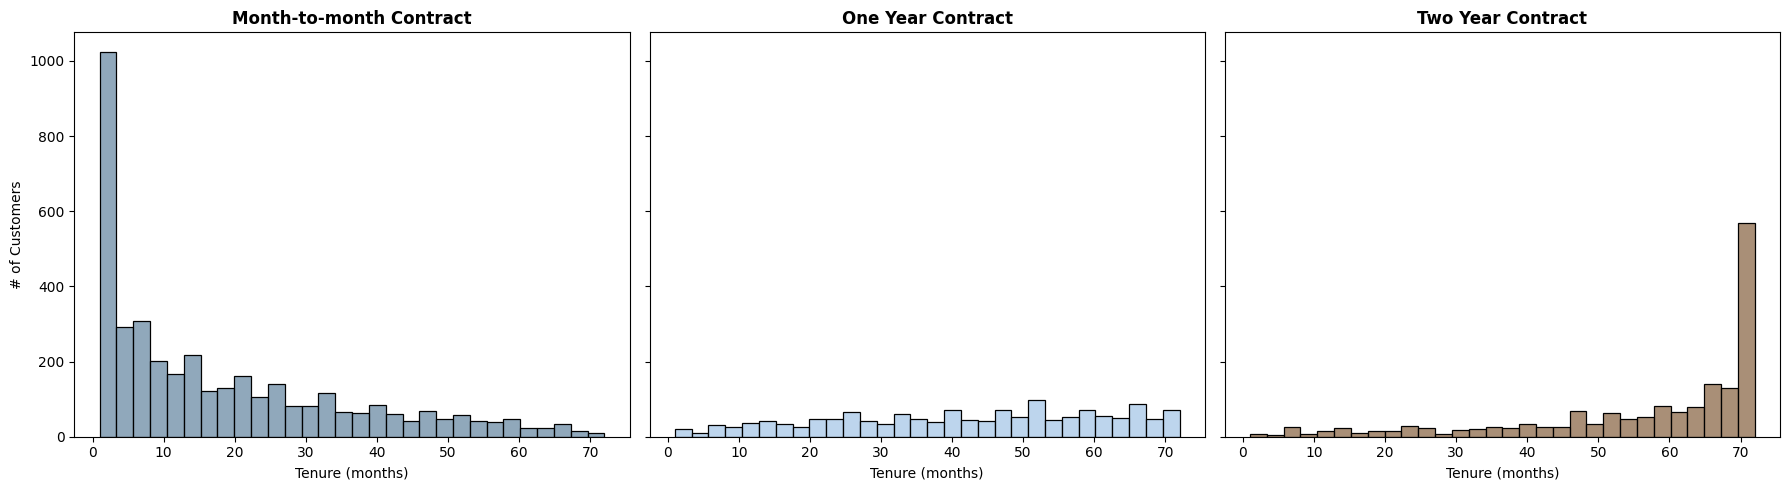

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18,5))

# Month-to-month
sns.histplot(
    df[df['Contract']=='Month-to-month']['Tenure'],
    bins=30,
    color='#6B8BA4',
    edgecolor='black',
    ax=ax1
)
ax1.set_title('Month-to-month Contract', fontweight='bold')
ax1.set_xlabel('Tenure (months)')
ax1.set_ylabel('# of Customers')

# One year
sns.histplot(
    df[df['Contract']=='One year']['Tenure'],
    bins=30,
    color='#A7C7E7',
    edgecolor='black',
    ax=ax2
)
ax2.set_title('One Year Contract', fontweight='bold')
ax2.set_xlabel('Tenure (months)')

# Two year
sns.histplot(
    df[df['Contract']=='Two year']['Tenure'],
    bins=30,
    color='#8C6A4A',
    edgecolor='black',
    ax=ax3
)
ax3.set_title('Two Year Contract', fontweight='bold')
ax3.set_xlabel('Tenure (months)')

plt.tight_layout()
plt.show()

The tenure distribution by contract type shows that customers on month-to-month contracts are mainly concentrated at lower tenure levels, while customers on two-year contracts tend to have tenure close to 70 months. This indicates that customers who choose longer contracts are more loyal and tend to remain with the company for a longer period of time.

## 3. Services Subscribed

In [120]:
df.columns


Index(['Customerid', 'Gender', 'Seniorcitizen', 'Partner', 'Dependents',
       'Tenure', 'Phoneservice', 'Multiplelines', 'Internetservice',
       'Onlinesecurity', 'Onlinebackup', 'Deviceprotection', 'Techsupport',
       'Streamingtv', 'Streamingmovies', 'Contract', 'Paperlessbilling',
       'Paymentmethod', 'Monthlycharges', 'Totalcharges', 'Churn',
       'SeniorGroup'],
      dtype='object')

In [123]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

services = ['Phoneservice', 'Multiplelines', 'Internetservice','Onlinesecurity', 'Onlinebackup', 'Deviceprotection', 'Techsupport','Streamingtv', 'Streamingmovies']

fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=services
)

total = len(df)

for i, col in enumerate(services):
    r = i // 3 + 1
    c = i % 3 + 1

    counts = df[col].value_counts().reset_index()
    counts.columns = ['Status','Count']
    counts['Percentage'] = counts['Count'] / total * 100

    fig.add_trace(
        go.Bar(
            x=counts['Status'],
            y=counts['Percentage'],
            text=counts['Percentage'].round(1).astype(str) + '%',
            textposition='inside',
            hovertemplate=
                f"<b>{col}</b><br>" +
                "Status: %{x}<br>" +
                "Customers: %{customdata[0]}<br>" +
                "Percentage: %{y:.2f}%<extra></extra>",
            customdata=counts[['Count']].values,
        ),
        row=r, col=c
    )

fig.update_layout(
    height=900,
    width=1100,
    title_text="<b>Services Subscribed – Customer Distribution</b>",
    title_x=0.5,
    showlegend=False
)

fig.show()
